----
# Laboratorium 4 - Transmitancja i charakterystyki częstotliwościowe
----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów wydziału Informatyki i Telekomunikacji Politechniki Poznańskiej  

---- 
## 0. Zagadnienia do opanowania przed zajęciami
---- 
### 0.1. Zapoznanie z postawami biblioteki *sympy*
https://docs.sympy.org/latest/tutorial/index.html
### 0.2. Przydatne informacje:
Funkcje z biblioteki *sympy* potrzebne do zrealizowania ćwiczenia:  
`sympy.Symbol, sympy.I, sympy.re(), sympy.im(), sympy.Abs, sympy.arg`

Dokumentacja i opisy poszczególnych funkcji *sympy*:

- https://docs.sympy.org/latest/tutorial/gotchas.html#symbols  
- https://docs.sympy.org/latest/modules/utilities/lambdify.html
- https://docs.sympy.org/latest/modules/functions/elementary.html



---- 
## Transmitancje
---- 

$$ H1(s) = {{s} \over {5s + 1}} $$  
$$ H2(s) = {{2} \over {s + 3}} $$  
$$ H3(s) = {{s + 2} \over {s + 3}} $$  
$$ H4(s) = {{s + 2} \over {s + 1}} $$  
$$ H5(s) = {{2s + 3} \over {2s + 4}} $$
$$ H6(s) = {{1} \over {2s^2 + s + 1}} $$    

In [1]:
%matplotlib inline
import sympy 
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
default_figsize=(12, 6)

----
## 1. Charakterystyka amplitudowa i fazowa układu - metoda analityczna
----
### Zadanie: Wyznacz i wyświetl matematyczną postać charakterystyki amplitudowej i fazowej dla układu o podanej transmitancji operatorowej.
Podpowiedź: użyj `sympy.I`, `sympy.re()`, `sympy.im()`  

In [3]:
#declare symbolic variable 'ω' (omega)
ω = sympy.Symbol('ω', real = True)
#declare symbolic variable 's'
s = 0 + sympy.I*ω 

# transmitancja układów
H1 = s / (5*s + 1)
H2 = 2 / (s + 3)
H3 = (s + 2)/(s + 3)
H4 = (s + 2)/(s + 1)
H5 = (2*s + 3) / (2 * s + 4)
H6 = 1 / (2*s**2 + s + 1)

H = H6

# wyznaczenie części rzeczywistej i urojonej transmitancji
re = sympy.re(H)
im = sympy.im(H)
display(re, im)
# wyznaczenie modułu i argumentu transmitancji
modul = sympy.sqrt(re**2 + im**2)
faza = sympy.atan(im/re)
faza1 = sympy.atan2(im, re)
display('modul=',modul)
display('faza=',faza)
display('faza1=',faza1)




(1 - 2*ω**2)/(ω**2 + (1 - 2*ω**2)**2)

-ω/(ω**2 + (1 - 2*ω**2)**2)

'modul='

sqrt(ω**2/(ω**2 + (1 - 2*ω**2)**2)**2 + (1 - 2*ω**2)**2/(ω**2 + (1 - 2*ω**2)**2)**2)

'faza='

-atan(ω/(1 - 2*ω**2))

'faza1='

atan2(-ω/(ω**2 + (1 - 2*ω**2)**2), (1 - 2*ω**2)/(ω**2 + (1 - 2*ω**2)**2))

----
## 2. Charakterystyka amplitudowa i fazowa układu - metoda analityczna - wykres
----
### Zadanie: Sporządzić wykresy wyznaczonych wcześniej charakterystyk amplitudowej i fazowej
Okno wykresu podziel na dwie kolumny, w lewej umieść wykres charakterystyki amplitudowej a prawej wykres charakterystyki fazowej. Dodaj opisy i tytuły. Przyjmij wartości zmiennej 'w' z zakresu od $10^{-2}$ do $10^{2}$).  
Podpowiedź: użyj `numpy.logspace`, `sympy.lambdify`, `matplotlib.axes.Axes.loglog`, `matplotlib.axes.Axes.semilogx`

<lambdifygenerated-5>:2: RuntimeWarning: overflow encountered in square
  return sqrt(ω**2/(ω**2 + (1 - 2*ω**2)**2)**2 + (1 - 2*ω**2)**2/(ω**2 + (1 - 2*ω**2)**2)**2)
<lambdifygenerated-5>:2: RuntimeWarning: invalid value encountered in divide
  return sqrt(ω**2/(ω**2 + (1 - 2*ω**2)**2)**2 + (1 - 2*ω**2)**2/(ω**2 + (1 - 2*ω**2)**2)**2)


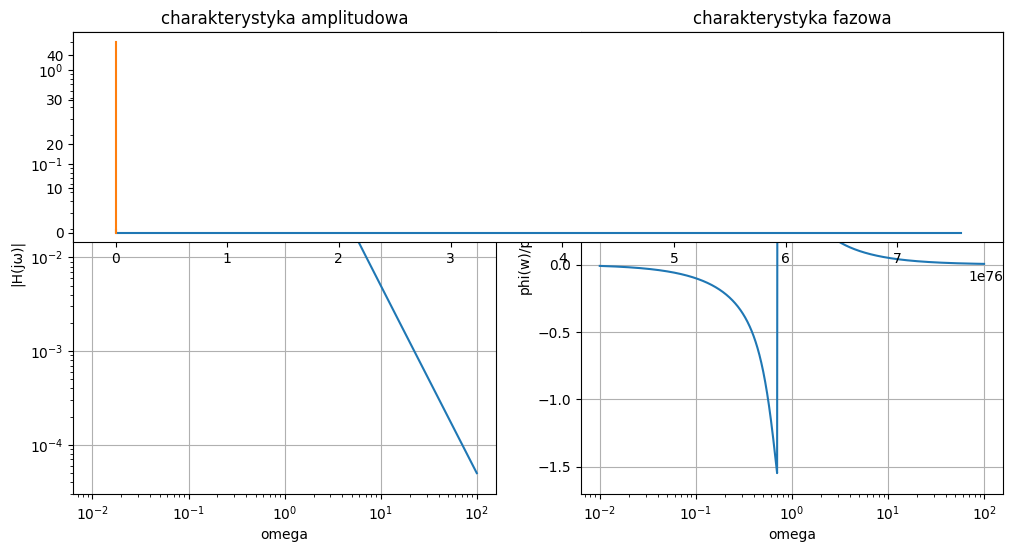

In [5]:
#wykres charakterystyki amplitudowej i charakterystyki fazowej
h1_impl = sympy.lambdify(ω, H, "numpy")
modulH1_impl = sympy.lambdify(ω, modul, 'numpy')
argH1_impl = sympy.lambdify(ω, faza, 'numpy')

w=np.logspace(-2,2,1000)
Mod=sympy.lambdify(ω,modul,'numpy')(w)
P=sympy.lambdify(ω,faza,'numpy')(w)

fig,axs=plt.subplots(1,2,figsize = default_figsize)
axs[0].loglog(w,Mod)
axs[0].set_title("charakterystyka amplitudowa")
axs[0].set_xlabel("omega")
axs[0].set_ylabel("|H(jω)|")
axs[0].grid()

axs[1].semilogx(w,P)
axs[1].set_title("charakterystyka fazowa")
axs[1].set_xlabel("omega")
axs[1].set_ylabel("phi(w)/pi")
axs[1].grid()

wartosc_omeg = np.linspace(10**(-2), 10**(2), 1000)
#postac w skali logartmicznej
wartosc_omeg_log = np.logspace(10**(-2), 10**(2), 1000)

wartosci_amplitudy = modulH1_impl(wartosc_omeg_log)
wartosci_faz = argH1_impl(wartosc_omeg_log)

#f1, f2 = plt.subplot(2,1)
plt.subplot(2, 1, 1)
plt.plot(wartosc_omeg_log, wartosci_amplitudy)
plt.grid()

plt.plot(wartosc_omeg, np.degrees(wartosci_faz))
plt.grid()


----
## 3. Charakterystyka amplitudowa i fazowa układu - metoda numeryczna
----
### Zadanie: Sporządzić wykresy charakterystyk amplitudowej i fazowej korzystając jedynie z biblioteki `numpy`
Okno wykresu podziel na dwie kolumny, w lewej umieść wykres charakterystyki amplitudowej a prawej wykres charakterystyki fazowej. Dodaj opisy i tytuły. Przyjmij wartości zmiennej 'w' z zakresu od $10^{-2}$ do $10^{2}$).  
Podpowiedź: $ H(s) = {{B(s)} \over {A(s)}} $
Podpowiedź: wylicz niezależnie wartości dla licznika i mianownika transmitancji  
Podpowiedź: użyj `numpy.logspace`, `numpy.poly1d`, `numpy.abs`, `numpy.angle`, `1j`

In [6]:
#kolejny wykres charakterystyki amplitudowej i fazowej
B = np.poly1d([1])
A = np.poly1d([2,1,1])
s=w*1*sympy.I

H = B(s) / A(s)

M = np.abs(H)
P = np.angle(H)

fig,axs=plt.subplots(1,2,figsize = default_figsize)
axs[0].loglog(w,M)
axs[0].set_title("charakterystyka amplitudowa")
axs[0].set_xlabel("omega")
axs[0].set_ylabel("|H(jω)|")
axs[0].grid()

axs[1].semilogx(w,P)
axs[1].set_title("charakterystyka fazowa")
axs[1].set_xlabel("omega")
axs[1].set_ylabel("phi(w)/pi")
axs[1].grid()

AttributeError: 'int' object has no attribute 'arctan2'

----
## 4. Charakterystyka amplitudowa i fazowa układu - metoda numeryczna z użyciem funkcji `freqs` z biblioteki `scipy`
----
Okno wykresu podziel na dwie kolumny, w lewej umieść wykres charakterystyki amplitudowej a prawej wykres charakterystyki fazowej. Dodaj opisy i tytuły. Przyjmij wartości zmiennej 'w' z zakresu od $10^{-2}$ do $10^{2}$).  
Podpowiedź: użyj funkcji `scipy.signal.freqs` do wyliczenia wartości transmitancji. 

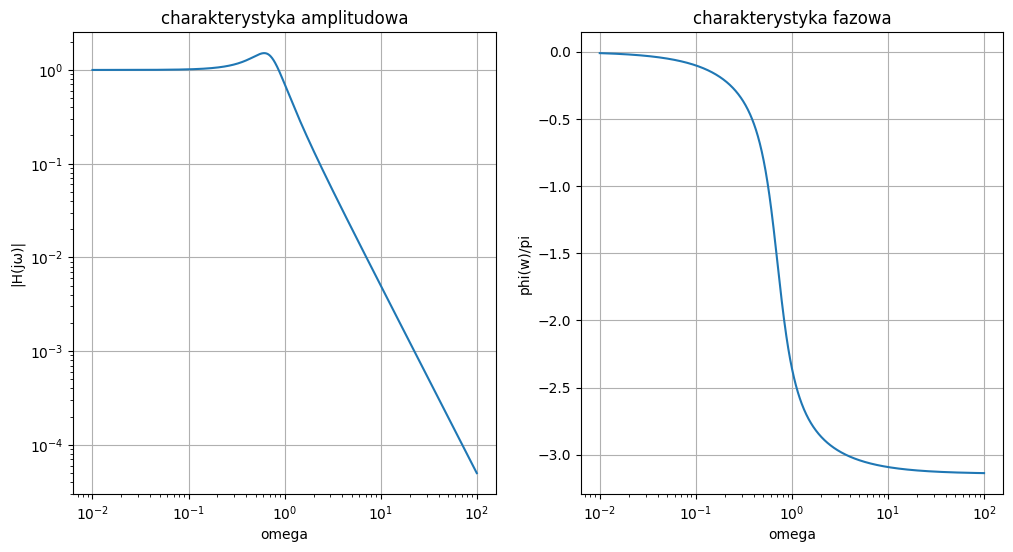

In [7]:
#jeszcze jeden wykres charakterystyki amplitudowej i fazowej
H=scipy.signal.freqs(B,A,w)[1]
M=np.abs(H)
P=np.angle(H)

fig,axs=plt.subplots(1,2,figsize = default_figsize)
axs[0].loglog(w,M)
axs[0].set_title("charakterystyka amplitudowa")
axs[0].set_xlabel("omega")
axs[0].set_ylabel("|H(jω)|")
axs[0].grid()

axs[1].semilogx(w,P)
axs[1].set_title("charakterystyka fazowa")
axs[1].set_xlabel("omega")
axs[1].set_ylabel("phi(w)/pi")
axs[1].grid()




---- 
## 5. Charakterystyka amplitudowo-fazowa układu
---- 
### Zadanie: Wyznacz część rzeczywistą oraz część urojoną transmitancji układu. Sporządzić wykres charakterystyki amplitudowo-fazowej dla układu o zadanej transmitancji.
Przyjmij wartości zmiennej 'w' z zakresu od $10^{-2}$ do $10^{2}$).  
Podpowiedź: użyj `numpy.real()`, `numpy.imag()`

Text(0, 0.5, 'Im')

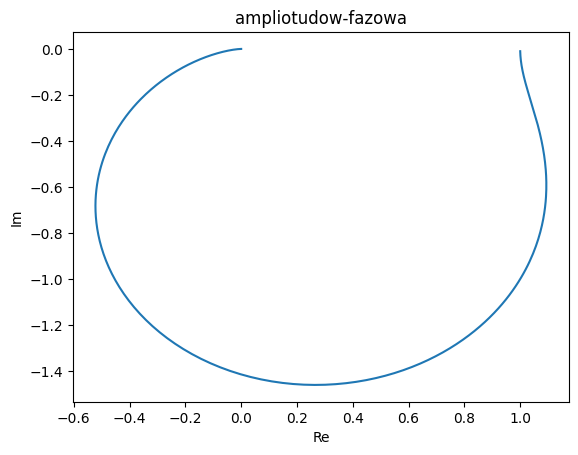

In [9]:
#dla odmiany wykres charakterystyki amplitudowo-fazowej
Re = np.real(H)
Im = np.imag(H)

w = np.linspace(0,1000, 10000)

fig1 = plt.figure()
plt.plot(Re, Im)
plt.title("ampliotudow-fazowa")
plt.xlabel("Re")
plt.ylabel("Im")
